In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv

/home/rishukumar/Documents/CampusX/CampusX_Code/LangGraph_CampusX/myenv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
load_dotenv()

True

In [3]:
class ParentState(TypedDict):

    question: str
    answer_eng: str
    answer_hin: str

In [4]:
parent_llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash"
)
subgraph_llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash"
)

E0000 00:00:1766860211.889094   36514 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1766860211.911805   36514 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [5]:
def translate_text(state: ParentState):

    prompt = f"""
Translate the following text to Hindi.
Keep it natural and clear. Do not add extra content.

Text:
{state["answer_eng"]}
""".strip()
    
    translated_text = subgraph_llm.invoke(prompt).content

    return {'answer_hin': translated_text}

In [6]:
subgraph_builder = StateGraph(ParentState)

subgraph_builder.add_node('translate_text', translate_text)

subgraph_builder.add_edge(START, 'translate_text')
subgraph_builder.add_edge('translate_text', END)

subgraph = subgraph_builder.compile()

In [7]:
def generate_answer(state: ParentState):

    answer = parent_llm.invoke(f"You are a helpful assistant. Answer clearly.\n\nQuestion: {state['question']}").content
    return {'answer_eng': answer}

In [8]:
parent_builder = StateGraph(ParentState)

parent_builder.add_node("answer", generate_answer)
parent_builder.add_node("translate", subgraph) # we are not using node, isntead we are using subgraph as node

parent_builder.add_edge(START, 'answer')
parent_builder.add_edge('answer', 'translate')
parent_builder.add_edge('translate', END)

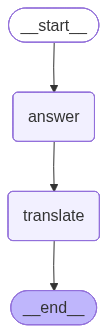

In [9]:
graph = parent_builder.compile()

graph

In [10]:
graph.invoke({'question': 'What is quantum physics'})

Failed to multipart ingest runs: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


{'question': 'What is quantum physics',
 'answer_eng': 'Quantum physics, also known as **quantum mechanics** or **quantum theory**, is a fundamental branch of physics that describes the behavior of matter and energy at the smallest scales – the atomic and subatomic levels.\n\nThink of it as the "rulebook" for the universe\'s tiniest constituents, like electrons, protons, neutrons, and photons. This rulebook is vastly different from the classical physics (Newton\'s laws, Maxwell\'s electromagnetism) that describes the world we experience every day.\n\nHere are the core ideas that define quantum physics:\n\n1.  **Quantization:**\n    *   Unlike classical physics where properties like energy, momentum, and angular momentum can take on any value, in quantum physics, these properties come in discrete, indivisible packets called **quanta**.\n    *   **Analogy:** Imagine a staircase instead of a ramp. You can only stand on specific steps (quantized energy levels), not in between.\n\n2.  **Wav

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
